# DSCI 571 - Supervised Learning I

# Lab 1: An introduction to Decision Trees, Cross-validation and ML fundamentals

# BAIT 509 Assignment 1

__Evaluates__: Lectures 1 - 3. 

__Rubrics__: Your solutions will be assessed primarily on the accuracy of your coding, as well as the clarity and correctness of your written responses. The MDS rubrics provide a good guide as to what is expected of you in your responses to the assignment questions and how the TAs will grade your answers. See the following links for more details:

- [accuracy rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_accuracy.md), for evaluating your code.
- [reasoning rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_reasoning.md), for evaluating your written responses.

## Tidy Submission (5%)

- Complete this assignment by filling out this jupyter notebook.
- You must use proper English, spelling, and grammar.
- You will submit two things to Canvas:
    1. This jupyter notebook file containing your responses ( an `.ipynb` file) ; and,
    2. A html file of your completed notebook (use `jupyter nbconvert --to html_embed assignment.ipynb` in the terminal to generate the html file or under `File` -> `Export Notebook As` -> `HTML`).
- Submit your assignment through [UBC Canvas](https://canvas.ubc.ca/courses/35074) by **6pm Monday 20th January**.

## Table of Contents
- [Submission instructions](#si)
- [Introduction](#in)
- [Exercise 1: Decision trees with a toy dataset](#1)
- [Exercise 2: Decision trees with a real dataset](#2)
- [Exercise 3: Data splitting and model building](#3)
- [Exercise 4: `DummyClassifier`](#4)
- [Exercise 5: Hyperparameters](#5)

In [1]:
# Import libraries
import re
import sys
from hashlib import sha1

import numpy as np
import pandas as pd


# Visualization
import graphviz
import matplotlib.pyplot as plt
from IPython.display import HTML

# Classifiers
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Data splitting and model selection
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

# Autograding
import tests_lab1

## Submission instructions <a name="si"></a>
<hr>
rubric={mechanics:4}

You will receive marks for correctly submitting this assignment. 

**IMPORTANT:<br>This is a group lab; you will complete this lab with your assigned partner(s). You will share a single GitHub repository which you can all push to. Only one person in the group needs to submit to Canvas.**

**Please add a link to your GitHub repository here: LINK TO YOUR GITHUB REPO**

To submit this assignment follow the instructions below:

- Push your assignment to your GitHub repository. 

- Upload an HTML render of your assignment to Canvas. The last cell of this notebook will help you do that.
- Be sure to follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).

[Here](https://github.com/UBC-MDS/public/tree/master/rubric) you will find the description of each rubric used in MDS.

**NOTE: The data you download for use in this lab SHOULD NOT BE PUSHED TO YOUR REPOSITORY. You might be penalised for pushing datasets to your repository. I have seeded the repository with `.gitignore` and hoping that it won't let you push CSVs.**

## Introduction and learning goals <a name="in"></a>
<hr>

Welcome to the lab! After working on this lab, you should be able to:

- create `X` (feature vectors) and `y` (targets) from a given dataset;   
- use the `fit` and `predict` paradigms in `sklearn`;
- use the `score` method in `sklearn` to calculate classification accuracy;  
- use `train_test_split` for data splitting and explain the importance of shuffling during data splitting; 
- train a decision tree using `sklearn` and visualize the trained decision tree using the `graphviz` package;
- build a decision tree classifier on a real-world dataset and explore different hyperparameters of the classifier;
- discuss the relationship between train accuracy and test accuracy and overfitting.

### Exercise 1: Decision trees with a toy dataset <a name="1"></a>
<hr>

Suppose you have three different job offers with comparable salaries and job descriptions. You want to decide which one to accept, and you want to make this decision based on which job is likely to make you happy. Being a very systematic person, you come up with three features associated with the offers, which are important for your happiness: whether the colleagues are supportive, work-hour flexibility, and whether the company is a start-up or not. 

In [2]:
offer_data = {
    # Features
    "supportive_colleagues": [1, 0, 0],
    "work_hour_flexibility": [0, 0, 1],
    "start_up": [0, 1, 1],
    # Target
    "target": ["?", "?", "?"],
}

offer_df = pd.DataFrame(offer_data)
offer_df

,supportive_colleagues,work_hour_flexibility,start_up,target
0,1,0,0,?
1,0,0,1,?
2,0,1,1,?


Next, you ask the following questions to some of your friends (who you think have similar notions of happiness) regarding their jobs:

1. Do you have supportive colleagues? (1 for 'yes' and 0 for 'no')
2. Do you have flexible work hours? (1 for 'yes' and 0 for 'no')
3. Do you work for a start-up? (1 for 'start up' and 0 for 'non start up')
4. Are you happy in your job? (happy or unhappy)

You get the following data from this toy survey. Your goal is to train a machine learning model using this toy data and then use this model to predict which job is likely to make you happy. 

In [3]:
import pandas as pd

happiness_data = {
    # Features
    "supportive_colleagues": [1, 1, 1, 0, 0, 1, 1, 0, 1, 0],
    "work_hour_flexibility": [1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
    "start_up": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
    # Target
    "target": [
        "happy",
        "happy",
        "happy",
        "unhappy",
        "unhappy",
        "happy",
        "happy",
        "unhappy",
        "unhappy",
        "unhappy",
    ],
}

train_df = pd.DataFrame(happiness_data)
train_df

,supportive_colleagues,work_hour_flexibility,start_up,target
0,1,1,1,happy
1,1,1,0,happy
2,1,0,1,happy
3,0,1,0,unhappy
4,0,1,1,unhappy
5,1,0,0,happy
6,1,1,0,happy
7,0,0,1,unhappy
8,1,0,1,unhappy
9,0,0,0,unhappy


### 1.1 Decision stump by hand 
rubric={autograde:2}

**Your tasks:**

With this toy dataset, build a decision stump (decision tree with only 1 split) by splitting on the condition `supportive_colleagues == 1`. What training accuracy would you get with this decision stump? 

Save the accuracy as a decimal in an object named `supportive_colleagues_acc`. 

In [4]:
supportive_colleagues_acc = None

### BEGIN SOLUTION

supportive_colleagues_acc = 9 / 10

### END SOLUTION

In [5]:
assert tests_lab1.ex1_1(
    supportive_colleagues_acc
), "Your answer is incorrect, see traceback above."
print("Success")

Success


### 1.2 Create `X`, `y`
rubric={autograde:2}

Recall that in `scikit-learn` before building a classifier we need to create `X` (features) and `y` (target). 

**Your tasks:**

From `train_df`, create `X` and `y`; save them in objects named `X` and `y`, respectively. 

In [6]:
X = None
y = None

### BEGIN SOLUTION

X = train_df.drop(columns=["target"])
y = train_df["target"]

### END SOLUTION

In [7]:
assert tests_lab1.ex1_2(X, y), "Your answer is incorrect, see traceback above."
print("Success")

Success


### 1.3 `fit` a decision tree classifier 
rubric={accuracy:2}

The idea of a machine learning algorithm is to *fit* the best model on the given training data, `X` (features) and `y` (their corresponding targets), and then using this model to *predict* targets for new examples. 

**Your tasks:**

`fit` `sklearn`'s decision tree model on this toy dataset. Set `random_state=16` when you create a `DecisionTreeClassifier` object.   

In [8]:
toy_tree = None

### BEGIN SOLUTION

# instantiate a class of the DecisionTreeClassifier
toy_tree = DecisionTreeClassifier(random_state=16)
# fit the model to the data. The semicolon at the end is used to suppress displaying the output of model.fit
toy_tree.fit(X, y)

### END SOLUTION

DecisionTreeClassifier(random_state=16)

### 1.5 `score` and `predict`
rubric={accuracy:2,reasoning:4}

**Your tasks:**

1. Score the decision tree on the training data (`X` and `y`). Do you get perfect training accuracy? Why or why not? 
2. Now make predictions on the jobs offered in `offer_df`. In which job you are likely to be happy? 

In [11]:
### BEGIN SOLUTION

# 1.5.1
print("Training accuracy %0.3f" % (toy_tree.score(X, y)))
train_df["predicted"] = toy_tree.predict(X)
train_df

### END SOLUTION

Training accuracy 0.900


,supportive_colleagues,work_hour_flexibility,start_up,target,predicted
0,1,1,1,happy,happy
1,1,1,0,happy,happy
2,1,0,1,happy,happy
3,0,1,0,unhappy,unhappy
4,0,1,1,unhappy,unhappy
5,1,0,0,happy,happy
6,1,1,0,happy,happy
7,0,0,1,unhappy,unhappy
8,1,0,1,unhappy,happy
9,0,0,0,unhappy,unhappy


### BEGIN SOLUTION
We do not get perfect training accuracy. Notice that the model made an "error" on example with index 8; the original target is "unhappy" and the predicted one is "happy". This is because we have two examples in the dataset with exactly the same feature vectors but different targets. Our model picks the label "happy". 
### END SOLUTION

In [12]:
### BEGIN SOLUTION

# 1.5.2
offer_df["predicted"] = toy_tree.predict(offer_df.drop(columns=["target"]))
offer_df

### END SOLUTION

,supportive_colleagues,work_hour_flexibility,start_up,target,predicted
0,1,0,0,?,happy
1,0,0,1,?,unhappy
2,0,1,1,?,unhappy


### BEGIN SOLUTION
According to the model, you are likely to be happy in the job with index 0 where supportive_colleagues == 1. 
### END SOLUTION

## Exercise 2: Decision trees on a real dataset <a name="2"></a>
<hr>

 ### Introducing the Spotify Song Attributes dataset
 
 
For the rest of the lab you'll be using Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset.
The dataset contains a number of features of songs from 2017 and a binary target variable representing whether the user liked the song or not. See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). The supervised machine learning task for this dataset is predicting  whether the user likes a song or not given a number of song features.

This dataset is publicly available on Kaggle, but not licensed to be freely distributed. So we do not provide this dataset in your repository, and you will have to download it yourself. Follow the steps below to get the data CSV. 

- If you do not have an account with Kaggle, you will first need to create one. (It's free.) 
- Login to your account and [download the data](https://www.kaggle.com/geomack/spotifyclassification/downloads/spotifyclassification.zip/1) the dataset;  
- (You should always) Read the [terms and conditions](https://www.kaggle.com/terms) before using the data.
- Save the CSV in the lab folder. (You will not be able to push it to your repository (hopefully) because I have seeded the repository wich `.gitignore`.)   

The starter code below reads the data CSV and splits it into `train_df` and `test_df`. In this exercise use `train_df` instead of `spotify_df`. In the next exercise you'll be exploring splitting on your own.  

In [3]:
### BEGIN STARTER CODE

spotify_df = pd.read_csv("spotify.csv", index_col=0)


### END STARTER CODE

NameError: name 'pd' is not defined

## New question on train_test_split

In [2]:
train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=123)

NameError: name 'train_test_split' is not defined

**For the next exercises use `train_df` instead of `spotify_df`.**

### 2.3 Plotting histograms 
rubric={viz:5,reasoning:4}

The starter code below produces histograms for the `danceability` feature that shows the distribution of the feature values  separated for positive (1) and negative (0) target values. 

*Note: I am using pandas plotting here, which I believe you have learned in 511. You'll be learning using `altair` for producing prettier plots in the program.*

In [1]:
train_df['danceability'].plot.hist(bins=20, legend=True)

NameError: name 'train_df' is not defined

start with all danceability 
facet on target 
groupby 

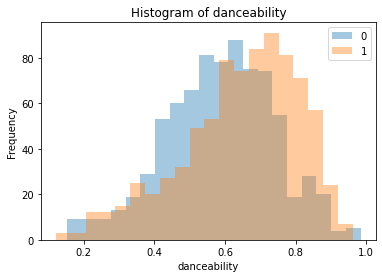

In [16]:
### BEGIN STARTER CODE
feat = "danceability"

ax = train_df.groupby("target")[feat].plot.hist(bins=20, alpha=0.4, legend=True)
plt.xlabel(feat)
plt.title("Histogram of " + feat)
plt.show()
### END STARTER CODE

**Your tasks:**

1. Create histograms for the following features in the order below. (Hint: You can use a `for` loop for plotting.)  
    - acousticness
    - tempo
    - instrumentalness
    - energy
    - valence
2. Which features might be useful in differentiating the target classes?


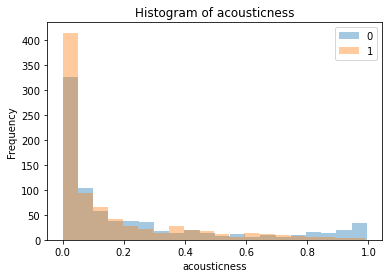

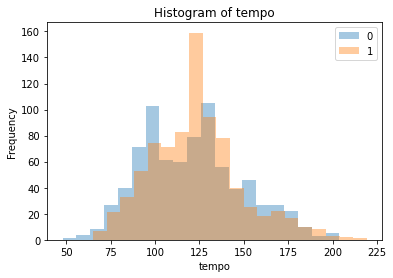

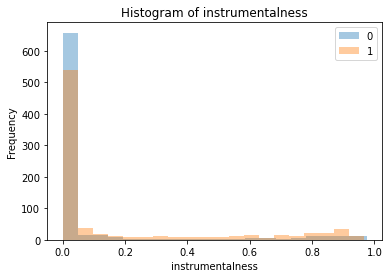

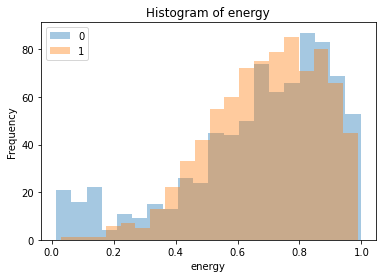

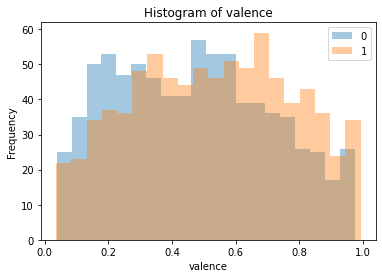

In [17]:
### BEGIN SOLUTION

features = ["acousticness", "tempo", "instrumentalness", "energy", "valence"]
for feat in features:
    ax = train_df.groupby("target")[feat].plot.hist(bins=20, alpha=0.4, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()

### END SOLUTION

### BEGIN SOLUTION

**2.3.2_solution_key**

From the above, it looks like people may like songs with higher danceability; a reasonable split might be to predict $1$ if danceability is greater than $0.7$. Another reasonable split could be to predict $0$ if energy is less than around $0.2$.

### END SOLUTION

## Exercise 3: Data splitting and model building <a name="3"></a>
<hr>
Recall that in machine learning what we care about is generalization; we want to build models that generalize well on unseen examples. One way to ensure this is by splitting the data into training data and test data, building and tuning the model only using the training data, and then doing the final assessing on the test data. 

In the starter code at the beginning of Exercise 1, we used `scikit-learn`'s [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the data. In this exercise we will  convince ourselves why do we need to use this method. 

The starter code below creates `X` and `y` for you to use in the following questions. In the exercises below, you'll have to calculate `train` and `test` accuracy several times. To make it a bit easy for you, I am providing you with a function `fit_and_report` which fits a model and prints train and test accuracies. Feel free to use this function. 

### 3.2 Building a Dummy Classfier and Decision Tree 
rubric={accuracy:3,reasoning:2}

**Your tasks:** 


3. Train `DummyClassifier` on the training set and score it on the train and test sets.    
4. Now train the `DecisionTreeClassifier` with `random_state=123` on the training set and score it on the train and test sets.   
1. Now split the Spotify dataset into a 80% train and 20% test using [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state=123`.
2. Train `DummyClassifier` on the training set and score it on the train and test sets.    
3. Train the `DecisionTreeClassifier` with `random_state=123` on the training set and score it on the train and test sets. 
4. Compare the results with 3.1 and 3.2.

In [25]:
### BEGIN SOLUTION
# 3.2.3_solution

dummy_clf = DummyClassifier(strategy="most_frequent")
fit_and_report(dummy_clf, X_train, y_train, X_test, y_test)

### END SOLUTION

Training accuracy: 0.511
Test accuracy: 0.491


In [26]:
### BEGIN SOLUTION
# 3.2.4_solution

model = DecisionTreeClassifier(random_state=123)
fit_and_report(model, X_train, y_train, X_test, y_test)

### END SOLUTION

Training accuracy: 0.999
Test accuracy: 0.673


### BEGIN SOLUTION

**3.2.5_solution_key**

The test accuracies for both the `DummyClassifier` and the `DecisionTreeClassifier` when we split with shuffled data are markedly better than when split without shuffling. That said, the model still seems to overfit; the gap between train and test error is quite large. 

**3.2.6_solution_key**

Yes, `DummyClassifier` can be sensitive to data shuffling and splitting. For instance, it is possible that the training data only contains positive examples and test data only contains negative examples. The test accuracy would be 0 in that case.  
### END SOLUTION

In [27]:
### BEGIN SOLUTION

# 3.3.1_solution
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

### END SOLUTION

In [28]:
### BEGIN SOLUTION

# 3.3.2_solution
dummy_clf = DummyClassifier(strategy="most_frequent")
fit_and_report(dummy_clf, X_train, y_train, X_test, y_test)

### END SOLUTION

Training accuracy: 0.508
Test accuracy: 0.498


In [29]:
### BEGIN SOLUTION

# 3.3.3_solution
model = DecisionTreeClassifier(random_state=123)
fit_and_report(model, X_train, y_train, X_test, y_test)

### END SOLUTION

Training accuracy: 0.999
Test accuracy: 0.688


### BEGIN SOLUTION

# 3.3.4_solution

The results are comparable with 3.2, when we split the data ourselves. 

### END SOLUTION

### 3.4 Cross validation
rubric={accuracy:3,reasoning:4}

**Your tasks:** 

1. Now instead of a single train test split, try 5-fold cross validation using `cross_validate` on `X` and `y` by passing `return_train_score=True`. Display the results as a pandas dataframe. 
2. Compare the results with 3.3. (Write 1 to 3 sentences.)

In [30]:
### BEGIN SOLUTION

from sklearn.model_selection import cross_validate

# 3.4.1_solution
folds = 5
scores = cross_validate(model, X, y, cv=folds, return_train_score=True)
df = pd.DataFrame(scores)
df

### END SOLUTION

,fit_time,score_time,test_score,train_score
0,0.012777,0.001380,0.685644,0.999380
1,0.012767,0.001408,0.638614,0.998760
2,0.010437,0.001157,0.578164,0.998761
3,0.010537,0.001144,0.662531,0.998141
4,0.010170,0.001136,0.665012,0.998761


In [31]:
### BEGIN SOLUTION

df.mean()

### END SOLUTION

fit_time       0.011338
score_time     0.001245
test_score     0.645993
train_score    0.998761
dtype: float64

### BEGIN SOLUTION
**3.4.2_solution_key**

Looks like there is quite a bit of variation in accuracies in different folds. The mean cross validation accuracy is better than the `DummyClassifier` but worse than the accuracy in 3.3. 

**3.4.3_solution_key**

We are kind of in gray area here. We are violating the golden rule in the sense that we haven't split the data before running the cross validation and we are calling `cross_validate` on `X` and `y`. Although in each fold, validation and train splits are separate and training doesn't influence the validation accuracy, we do not really have a test split here to assess the accuracy of the model. 
### END SOLUTION

- Build Knn default. 
score with validation from above 

- Hyperparameter tuning. 

## Exercise 5: Hyperparameters <a name="5"></a>
<hr>

### 5.1 Training, validation, and test accuracy 
rubric={accuracy:4,viz:2}

In lecture 2, we explored the `max_depth` hyperparameter of the `DecisionTreeClassifier`. In this exercise, you'll explore another hyperparameter, `min_samples_split`. See the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details on this hyperparameter.

**Your tasks:**

1. Split the Spotify dataset into a 80% train and 20% test subset using [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and `random_state=123`.
2. Explore the `min_samples_split` hyperparameter within the range 250 to 10. For each `min_samples_split`
    - Create a `DecisionTreeClassifier` object with the `min_samples_split`;
    - Run 10-fold cross validation with this `min_samples_split` using `cross_validate` to get the mean train and validation accuracies. Recall using `return_train_score` argument to get the training score in each fold. 
3. Show your results as a pandas dataframe. 
4. Make a plot with the `min_samples_split` of the decision tree on the *x*-axis and the accuracy on the train and validation sets on the *y*-axis. 

Note: Since you are just starting with visualization class, you may use whatever tool you like for plotting. We also have done something similar in lecture 2, and you may adapt that code to answer this question. 

In [36]:
### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

results_dict = {
    "min_samples_split": [],
    "mean_train_score": [],
    "mean_cv_score": [],
    "std_test_score": [],
    "std_train_score": [],
}
param_grid = {"min_samples_split": np.arange(250, 0, -10)}

for min_samples_split in param_grid["min_samples_split"]:
    model = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["min_samples_split"].append(min_samples_split)
    results_dict["mean_cv_score"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_score"].append(np.mean(scores["train_score"]))
    results_dict["std_test_score"].append(scores["test_score"].std())
    results_dict["std_train_score"].append(scores["train_score"].std())

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("min_samples_split")

### END SOLUTION

In [37]:
### BEGIN SOLUTION

results_df

### END SOLUTION

,mean_train_score,mean_cv_score,std_test_score,std_train_score
min_samples_split,,,,
250,0.728250,0.673288,0.030873,0.010278
240,0.732797,0.678859,0.029061,0.011609
230,0.742784,0.688805,0.034841,0.009007
220,0.751258,0.703056,0.036783,0.007188
210,0.751395,0.702435,0.035896,0.007189
200,0.751533,0.701814,0.035413,0.007266
190,0.751740,0.701814,0.035413,0.007424
180,0.752497,0.699329,0.032596,0.006211
170,0.754013,0.700556,0.029880,0.006955


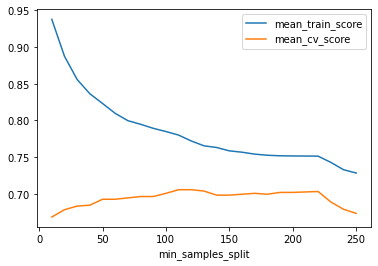

In [38]:
### BEGIN SOLUTION

results_df[["mean_train_score", "mean_cv_score"]].plot()

### END SOLUTION

### 5.2 Analysis, visualizing, and assessment
rubric={accuracy:3,viz:1,reasoning:4}

**Your tasks:**
1. From the results in 5.1, what `min_samples_split` would you pick in your final model? 
2. Visualize the best model tree using the `display_tree` function. You may have to use the `save` parameter of the function to save it in a file, as it might be too big to display here. 
3. Train the model again with the best `min_samples_split` using `X_train` and `y_train` and now carry out final assessment by calling `.score` on `X_test` and `y_test`. Are these results comparable to the cross-validation results? (Answer in one sentence.)
4. Why can't you simply pick the value of `min_samples_split` that does best on the training data? Why do we have to treat it like a hyperparameter rather than a parameter? (Answer in maximum 2 to 4 sentences.)

In [39]:
### BEGIN SOLUTION
best_min_samples_split = results_df.index.values[np.argmax(results_df["mean_cv_score"])]
print(
    "The maximum validation accuracy is %0.3f at best min_samples_split = %d "
    % (
        np.max(results_df["mean_cv_score"]),
        best_min_samples_split,
    )
)
### END SOLUTION

The maximum validation accuracy is 0.706 at best min_samples_split = 110 


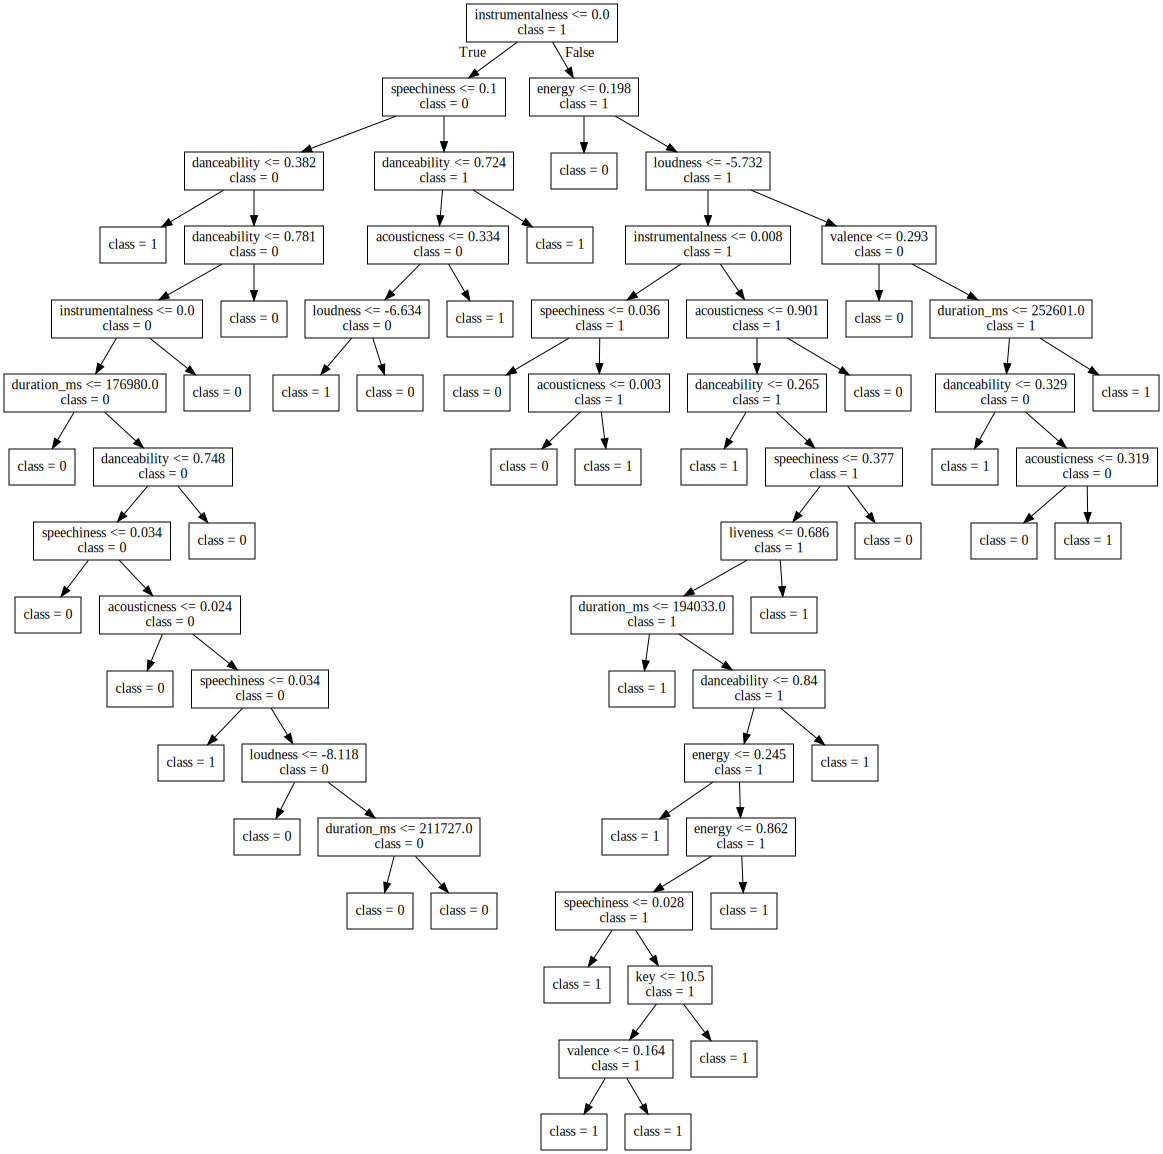

In [40]:
### BEGIN SOLUTION
model = DecisionTreeClassifier(min_samples_split=best_min_samples_split)
model.fit(X_train, y_train)
display_tree(X_train.columns, model)
### END SOLUTION

In [41]:
### BEGIN SOLUTION

model.score(X_test, y_test)

### END SOLUTION

0.7004950495049505

#### BEGIN SOLUTION

The test results are comparable to the cross-validation results.  

If we are to pick `min_samples_split` simply based on the training data, it'll pick the lowest value for the parameter as it performs best on the training set. (See the table and plot in 5.1.) That said, that model would be overfit and it won't generalize well on the validation data. That's why we treat it as a hyperparameter and pick the best value based on the cross-validation accuracy. 
#### END SOLUTION

### (optional) 5.3
rubric={reasoning:1}

**Note: The material required to answer this question is not covered this week. This block I am trying something new. In some of the labs I will be including an optional question which leads to the material in the upcoming week. It's a low-risk question and is worth only one point. The evaluation of this question is going to be pretty lenient. The intention here is not to get the perfect answer from you but to get you thinking about the upcoming material.**

In 5.1 you systematically searched for a model that generalizes well using cross-validation. 

1. Does this model use all the features provided to it? Which features seem most important? Does this match with what you observed in exploratory data analysis? 
2. Note that *acousticness* and *duration_ms* features are on a completely different scale. Does it matter when we learn a `DecisionTreeClassifier`?
3. Suppose you believe that *artist* is a useful feature in this task. How would you encode it in order to use it with `sklearn`? 

### BEGIN SOLUTION 

You'll learn about this in this week's material! 

### END SOLUTION

### Submission to Canvas

**PLEASE READ: When you are ready to submit your assignment do the following:**

- Run all cells in your notebook to make sure there are no errors by doing Kernel -->  Restart Kernel and Run All Cells...
- If you are using the "571" `conda` environment, make sure to select it before running all cells. 
- Convert your notebook to .html format using the `convert_notebook()` function below or by File -> Export Notebook As... -> Export Notebook to HTML
- Run the code `submit()` below to go through an interactive submission process to Canvas.
After submission, be sure to do a final push of all your work to GitHub (including the rendered html file).

In [42]:
# from canvasutils.submit import convert_notebook, submit

# convert_notebook("lab1.ipynb", "html")  # uncomment and run when you want to try convert your notebook (or you can convert manually from the File menu)
# submit(course_code=53670, token=False)  # uncomment and run when ready to submit to Canvas

### Congratulations on finishing lab 1! Well done! 